In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('darkgrid')
import sys

In [87]:
def eigen_module(re, im): # calculates module
    return math.sqrt(re*re + im*im)

In [3]:
def eigen_hist(arr, N):
    arr1 = np.array(arr)
    max = np.amax(arr1)
    delta = max/N
    arr_hist = []
    arr_x = []
    for i in range(N):
        count = 0
        for j in range(arr1.size):
            if (arr1[j] > i*delta and arr1[j] <= (i+1)*delta):
                count+=1
        arr_hist.append(count/math.pi/(((i+1)*delta)**2 - (i*delta)**2)/arr1.size)
        arr_x.append(i*delta)
    plt.plot(arr_x, arr_hist, 'o')
    plt.show()
    plt.clf()

In [4]:
def eigen_hist_nonorm(arr, N):
    arr1 = np.array(arr)
    max = np.amax(arr1)
    delta = max/N
    arr_hist = []
    arr_x = []
    for i in range(N):
        count = 0
        for j in range(arr1.size):
            if (arr1[j] > i*delta and arr1[j] <= (i+1)*delta):
                count+=1
        arr_hist.append(count)
        arr_x.append(i*delta)
    plt.plot(arr_x, arr_hist, 'o')
    plt.show()
    plt.clf()

In [46]:
def find_module(data, res): # creates array res of modules of eigenvalues from data
    arr_module = []
    for index, row in data.iterrows():
        arr_module.append(eigen_module(row['re']-0.0075, row['im']))
    res.append(arr_module)

In [72]:
def group_module(data, arr): # arr means 'mu' or 'T'
    res = []
    data.groupby(arr).apply(find_module, res)
    return res

In [81]:
def find_complex(data, res_re, res_im): # creates arrays for re and im values from data
    arr_re = []
    arr_im = []
    for index, row in data.iterrows():
        arr_re.append(row['re']-0.0075)
        arr_im.append(row['im'])
    res_re.append(arr_re)
    res_im.append(arr_im)

In [82]:
def group_complex(data, arr): # arr means 'mu' or 'T'
    res_re = []
    res_im = []
    data.groupby(arr).apply(find_complex, res_re, res_im)
    return res_re, res_im

In [52]:
def draw_density(data, arr):
    res = group_module(data, arr)
    for i in range(1, len(res)):
        eigen_hist(res[i], 10)

In [53]:
def draw_complex(data, arr):
    res_re, res_im = group_complex(data, arr)
    for i in range(1, len(res_re)):
        plt.scatter(res_re[i], res_im[i], color='red', s = 0.2)
        plt.show()
        plt.clf()

In [35]:
path='../../results/data/nosmeared/CSV/eigenvalues_mu.csv' # read data meared/nosmeared and 'mu'/'T'
df_nosmeared_mu=pd.read_csv(path)

In [66]:
path1 = '../../results/data/nosmeared/CSV/eigenvalues_T.csv'
df_nosmeared_T=pd.read_csv(path1)

In [106]:
path2='../../results/data/smeared/CSV/eigenvalues_mu.csv'
df_smeared_mu=pd.read_csv(path2)

In [107]:
path3='../../results/data/smeared/CSV/eigenvalues_T.csv'
df_smeared_T=pd.read_csv(path3)
#df_smeared_T.loc[(df_smeared_T['T'] == 32) & (df_smeared_T['conf_number'] == 650)]

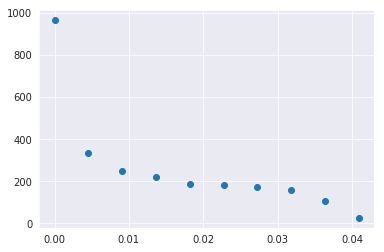

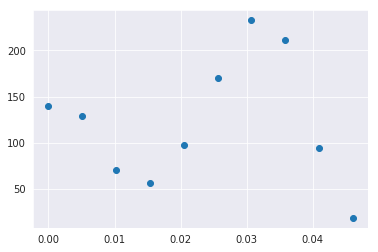

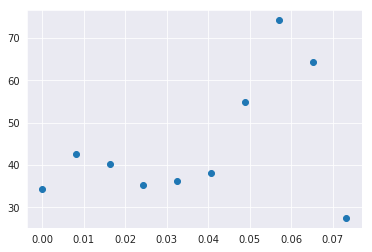

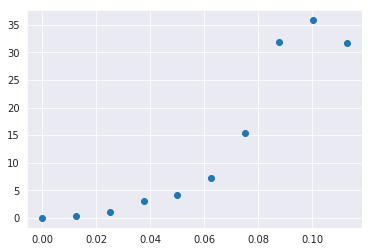

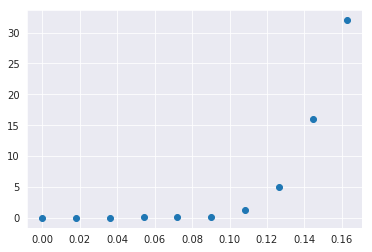

<Figure size 432x288 with 0 Axes>

In [75]:
draw_density(df_nosmeared_mu, 'mu')

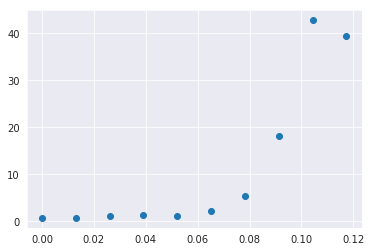

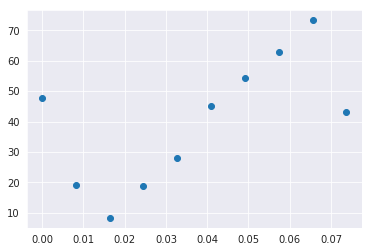

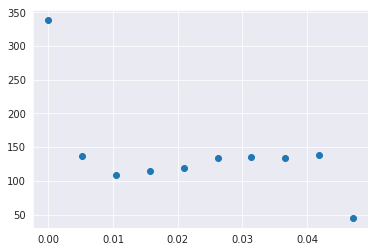

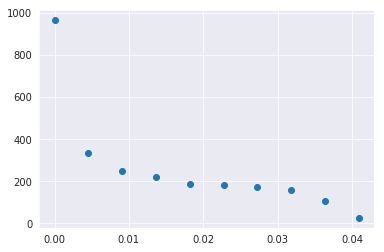

<Figure size 432x288 with 0 Axes>

In [76]:
draw_density(df_nosmeared_T, 'T')

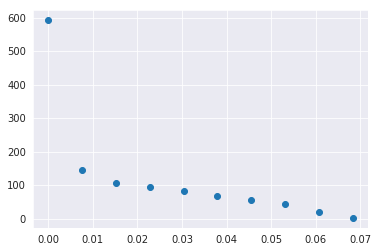

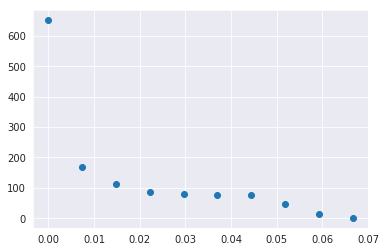

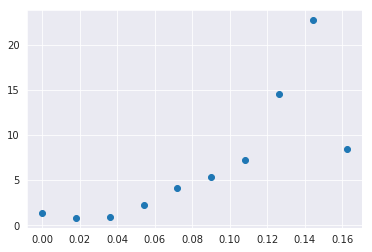

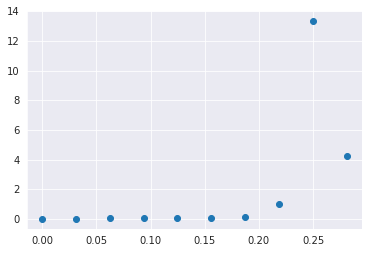

<Figure size 432x288 with 0 Axes>

In [108]:
draw_density(df_smeared_mu, 'mu')

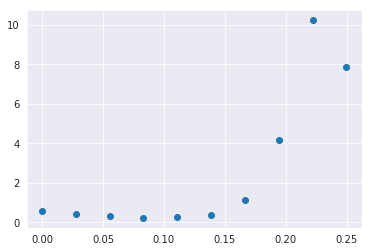

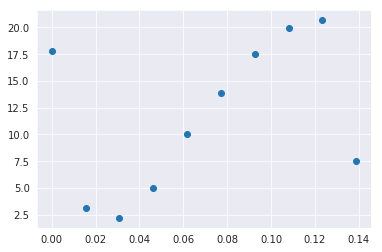

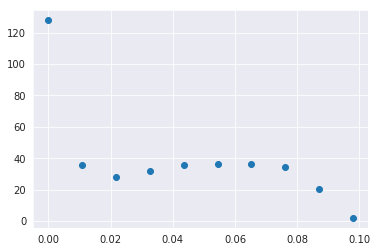

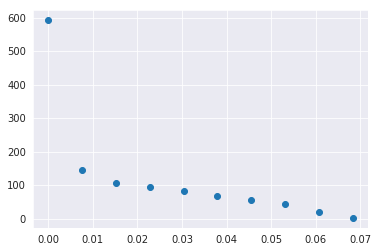

<Figure size 432x288 with 0 Axes>

In [109]:
draw_density(df_smeared_T, 'T')

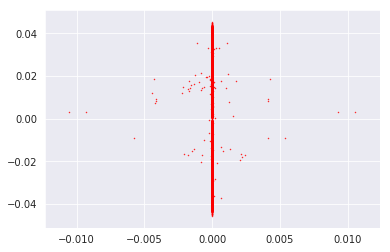

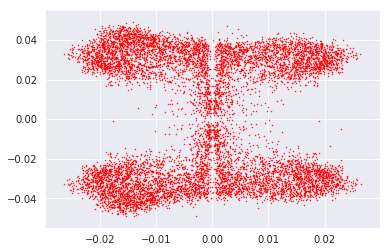

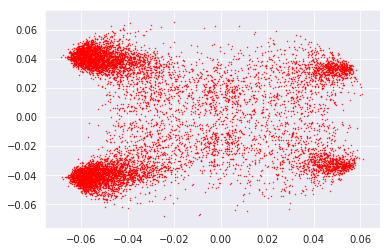

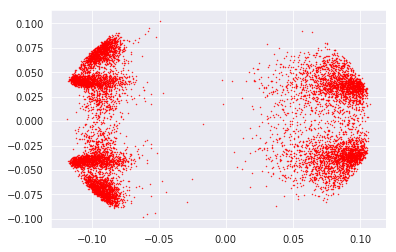

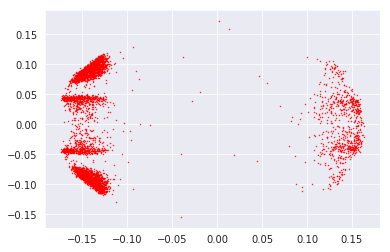

<Figure size 432x288 with 0 Axes>

In [83]:
draw_complex(df_nosmeared_mu, 'mu')

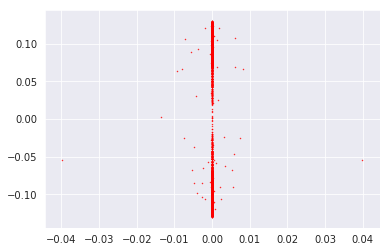

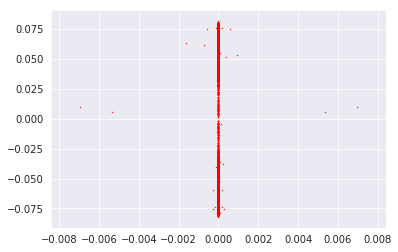

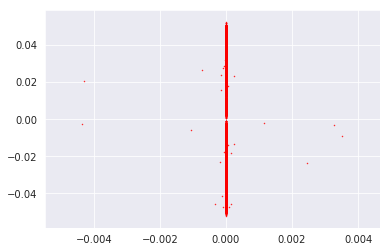

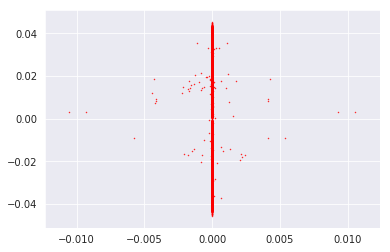

<Figure size 432x288 with 0 Axes>

In [84]:
draw_complex(df_nosmeared_T, 'T')

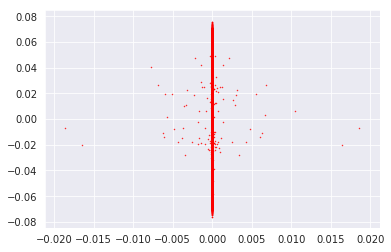

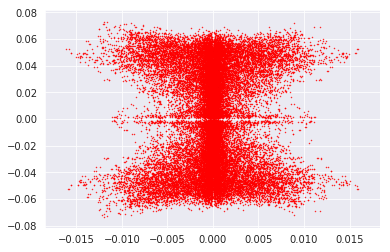

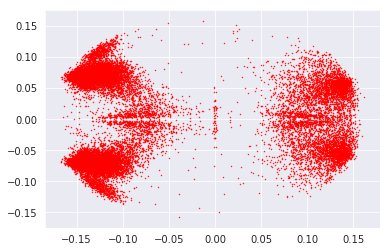

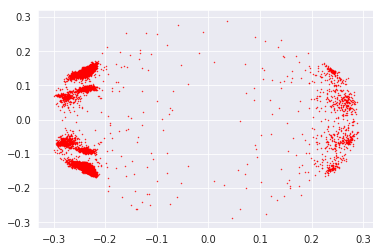

<Figure size 432x288 with 0 Axes>

In [110]:
draw_complex(df_smeared_mu, 'mu')

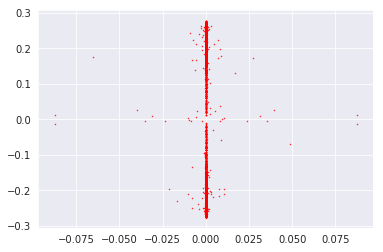

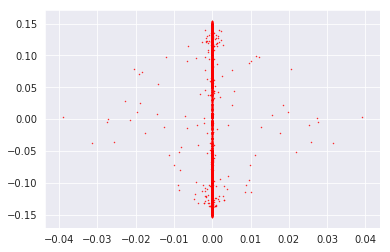

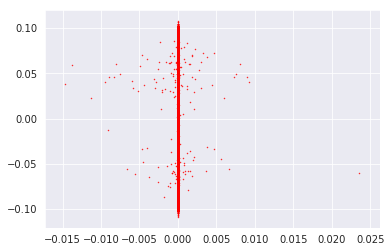

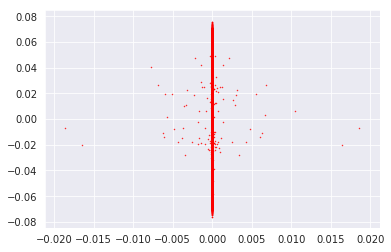

<Figure size 432x288 with 0 Axes>

In [111]:
draw_complex(df_smeared_T, 'T')